In [27]:
import os
import pandas as pd

file_path = "/Users/hanbui/Documents/SIC/SIC_BigData_Real-Estate-Price-Prediction/data/batdongsan/numerized/Dat_numerized-dataset.csv"

# Kiểm tra sự tồn tại của tệp trước khi đọc
if os.path.exists(file_path):
    df_ = pd.read_csv(file_path, thousands=',', skipinitialspace=True)
    print(df_.head())
else:
    print("File not found. Please check the file path.")

df = df_.copy()


   Unnamed: 0  DienTich                                             DiaChi  \
0           0     180.0         Đường 768, Xã Tân Bình, Vĩnh Cửu, Đồng Nai   
1           1   29235.0  Hẻm 50, Đường 1/5, Phường B'Lao, Bảo Lộc, Lâm ...   
2           2     250.0               Phường Cô Giang, Quận 1, Hồ Chí Minh   
3           3      63.0  Đường Bạch Thái Bưởi, Phường Đằng Giang, Ngô Q...   
4           4    3000.0                         Xã Cẩm Lĩnh, Ba Vì, Hà Nội   

   City  District        MucGia  MatTien  DuongVao  PhapLy        Lat  \
0  75.0     735.0           NaN      5.0       7.0     1.0  11.001454   
1  68.0     673.0  1.250000e+11     55.0       4.0     1.0  11.538185   
2  79.0     760.0  4.500000e+10     11.0       NaN     NaN  10.762480   
3  31.0     304.0  7.875000e+09      4.5       NaN     1.0  20.842289   
4   1.0     271.0  4.500000e+09      NaN       NaN     NaN        NaN   

         Long     Ward  
0  106.818515  26194.0  
1  107.800136  24826.0  
2  106.693775  26

## Tiền Xử Lí Dữ Liệu

In [28]:
df.head()

,Unnamed: 0,DienTich,DiaChi,City,District,MucGia,MatTien,DuongVao,PhapLy,Lat,Long,Ward
0,0,180.0,"Đường 768, Xã Tân Bình, Vĩnh Cửu, Đồng Nai",75.0,735.0,NaN,5.0,7.0,1.0,11.001454,106.818515,26194.0
1,1,29235.0,"Hẻm 50, Đường 1/5, Phường B'Lao, Bảo Lộc, Lâm ...",68.0,673.0,1.250000e+11,55.0,4.0,1.0,11.538185,107.800136,24826.0
2,2,250.0,"Phường Cô Giang, Quận 1, Hồ Chí Minh",79.0,760.0,4.500000e+10,11.0,NaN,NaN,10.762480,106.693775,26755.0
3,3,63.0,"Đường Bạch Thái Bưởi, Phường Đằng Giang, Ngô Q...",31.0,304.0,7.875000e+09,4.5,NaN,1.0,20.842289,106.704846,11359.0
4,4,3000.0,"Xã Cẩm Lĩnh, Ba Vì, Hà Nội",1.0,271.0,4.500000e+09,NaN,NaN,NaN,NaN,NaN,9673.0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23891 entries, 0 to 23890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  23891 non-null  int64  
 1   DienTich    23890 non-null  float64
 2   DiaChi      23890 non-null  object 
 3   City        23890 non-null  float64
 4   District    23882 non-null  float64
 5   MucGia      20061 non-null  float64
 6   MatTien     16077 non-null  float64
 7   DuongVao    14732 non-null  float64
 8   PhapLy      19304 non-null  float64
 9   Lat         22236 non-null  float64
 10  Long        22236 non-null  float64
 11  Ward        23670 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 2.2+ MB


In [30]:
print(df.shape)

(23891, 12)


In [31]:
print(df.isnull().sum())

Unnamed: 0       0
DienTich         1
DiaChi           1
City             1
District         9
MucGia        3830
MatTien       7814
DuongVao      9159
PhapLy        4587
Lat           1655
Long          1655
Ward           221
dtype: int64


In [32]:
df[df.duplicated]

,Unnamed: 0,DienTich,DiaChi,City,District,MucGia,MatTien,DuongVao,PhapLy,Lat,Long,Ward


<li>KHÔNG CÓ GIÁ TRỊ TRÙNG LẶP</li>

In [50]:
selected_columns = ['DienTich','MatTien','DuongVao','MucGia']
statistics = df[selected_columns].describe(percentiles=[0.25, 0.5, 0.7])
print(statistics)

           DienTich       MatTien      DuongVao        MucGia
count  16182.000000  11591.000000  10613.000000  1.618200e+04
mean     170.729472      7.015258     10.347263  8.322992e+09
std      152.859263      3.478956     16.189149  2.817187e+10
min        8.100000      0.380000      1.000000  3.300000e+06
25%       78.000000      5.000000      5.000000  1.540250e+09
50%      112.000000      5.480000      7.500000  3.400000e+09
70%      171.000000      7.800000     10.500000  6.000000e+09
max      887.000000     20.000000    827.000000  2.000000e+12


In [51]:
selected_columns = ['DienTich', 'MatTien','DuongVao', 'MucGia']

for i in selected_columns:
    if pd.api.types.is_numeric_dtype(df[i]):
        print(i, 'Min value:', df[i].min(), 'Max value:', df[i].max())

DienTich Min value: 8.1 Max value: 887.0
MatTien Min value: 0.38 Max value: 20.0
DuongVao Min value: 1.0 Max value: 827.0
MucGia Min value: 3300000.0 Max value: 2000000000000.0


<span>Diện tích 15 triệu mét vuông và mặt tiền 818 mét là quá lớn<span>

In [42]:
Q1 = df['DienTich'].quantile(0.25)
Q3 = df['DienTich'].quantile(0.75)
IQR = Q3 - Q1

# Xác định ngưỡng cho các giá trị ngoại lệ
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")


Lower bound for outliers: -396.5
Upper bound for outliers: 887.5


In [43]:
Q1 = df['MatTien'].quantile(0.25)
Q3 = df['MatTien'].quantile(0.75)
IQR = Q3 - Q1

# Xác định ngưỡng cho các giá trị ngoại lệ
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")


Lower bound for outliers: -4.0
Upper bound for outliers: 20.0


In [52]:
Q1 = df['DuongVao'].quantile(0.25)
Q3 = df['DuongVao'].quantile(0.75)
IQR = Q3 - Q1

# Xác định ngưỡng cho các giá trị ngoại lệ
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")


Lower bound for outliers: -5.5
Upper bound for outliers: 22.5


Loại bỏ các cột có giá trị Outliners

In [53]:
import numpy as np

df['USD'] = round(df['MucGia'] / 24000, 0)


rows = df[df['DienTich'] > 887]
df = df.drop(index=rows.index)


rows = df[df['MatTien'] > 20]
df = df.drop(index=rows.index)

rows = df[df['DuongVao'] > 22]
df = df.drop(index=rows.index)

df = df[df['USD'] > 0]
# Thêm cột log_price bằng cách lấy log của giá trị USD
df['log_price'] = np.log(df['USD'])

# In ra số lượng hàng sau khi làm sạch dữ liệu
print("The number of rows after cleaning data:", len(df))

The number of rows after cleaning data: 15479


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15479 entries, 2 to 23889
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  15479 non-null  int64  
 1   DienTich    15479 non-null  float64
 2   DiaChi      15479 non-null  object 
 3   City        15479 non-null  float64
 4   District    15476 non-null  float64
 5   MucGia      15479 non-null  float64
 6   MatTien     10960 non-null  float64
 7   DuongVao    9910 non-null   float64
 8   PhapLy      12650 non-null  float64
 9   Lat         14418 non-null  float64
 10  Long        14418 non-null  float64
 11  Ward        15346 non-null  float64
 12  USD         15479 non-null  float64
 13  log_price   15479 non-null  float64
dtypes: float64(12), int64(1), object(1)
memory usage: 1.8+ MB


## Trực Quan Dữ Liệu

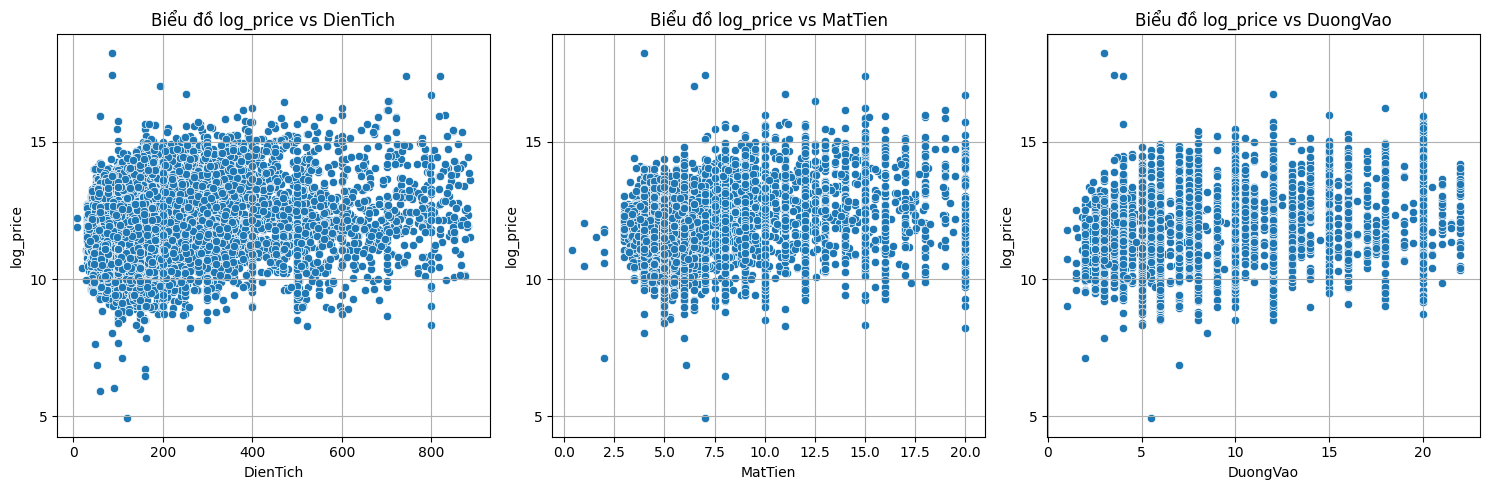

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Danh sách các cột muốn vẽ biểu đồ
columns_to_plot = ['DienTich', 'MatTien','DuongVao']

num_cols = 3  # Số cột bạn muốn trong lưới subplot
num_rows = (len(columns_to_plot) + num_cols - 1) // num_cols  # Tính số hàng cần thiết
fig, axs = plt.subplots(ncols=num_cols, nrows=num_rows, figsize=(15, 5*num_rows))

axs = axs.flatten()
for i, column in enumerate(columns_to_plot):
    sns.scatterplot(x=column, y='log_price', data=df, ax=axs[i])
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('log_price')
    axs[i].set_title(f'Biểu đồ log_price vs {column}')
    axs[i].set_yticks([5, 10, 15])  # Đặt các bước nhảy cho trục y
    axs[i].grid(True)

# Loại bỏ các trục dư thừa (nếu có)
for i in range(len(columns_to_plot), len(axs)):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()


Ta thấy 3 yếu tố này ảnh hưởng mạnh đến mức giá

In [63]:

value_counts = df['DiaChi'].value_counts()
print(value_counts)


DiaChi
Đường 420, Xã Bình Yên, Thạch Thất, Hà Nội                       53
Xã Lộc An, Bảo Lâm, Lâm Đồng                                     50
Đường Vườn Lài, Phường An Phú Đông, Quận 12, Hồ Chí Minh         49
Đường Phúc Lợi, Phường Phúc Lợi, Long Biên, Hà Nội               47
Xã Phúc Thọ, Lâm Hà, Lâm Đồng                                    41
                                                                 ..
Đường Nguyễn Trọng Dân, Xã Long Chánh, Gò Công, Tiền Giang        1
2/, Đường Số 6, Phường Bình Hưng Hòa B, Bình Tân, Hồ Chí Minh     1
Đường Nguyễn Huệ, Phường Lái Hiếu, Ngã Bảy, Hậu Giang             1
Đường Ba Chả, Xã Hưng Long, Bình Chánh, Hồ Chí Minh               1
Đường Quốc Lộ 3, Phường Đề Thám, Cao Bằng, Cao Bằng               1
Name: count, Length: 8258, dtype: int64


In [71]:
valid_cities = [
    'Hà Nội', 'Hồ Chí Minh', 'Đà Nẵng', 'Cần Thơ', 'Hải Phòng', 'Hạ Long', 'Nha Trang', 
    'Huế', 'Vũng Tàu', 'Biên Hòa', 'Quy Nhơn', 'Pleiku', 'Bình Dương', 'Bạc Liêu', 
    'Cà Mau', 'Sóc Trăng', 'Tây Ninh', 'Bến Tre', 'Long An', 'Tiền Giang', 'Trà Vinh', 
    'Hậu Giang', 'Đồng Tháp', 'An Giang', 'Kiên Giang', 'Vĩnh Long', 'Hà Tĩnh', 
    'Quảng Bình', 'Quảng Trị', 'Lâm Đồng', 'Đắk Lắk', 'Đắk Nông', 'Kon Tum', 'Gia Lai', 
    'Yên Bái', 'Thái Nguyên', 'Bắc Ninh', 'Bắc Giang', 'Hưng Yên', 'Hà Nam', 'Nam Định', 
    'Ninh Bình', 'Thanh Hóa', 'Nghệ An', 'Hòa Bình', 'Lào Cai', 'Tuyên Quang', 
    'Hà Giang', 'Cao Bằng', 'Lạng Sơn', 'Sơn La', 'Điện Biên', 'Hải Dương', 'Vĩnh Phúc', 
    'Hà Tây', 'Hưng Yên', 'Thái Bình', 'Hải Phòng', 'Bắc Kạn', 'Bắc Giang'
]


def extract_city(address):
    parts = address.split(',')
    for part in reversed(parts):
        part = part.strip().replace('.', '')
        if part in valid_cities:
            return part
    return None

# Tạo cột 'city' chứa tên thành phố
df['ThanhPho'] = df['DiaChi'].apply(extract_city)

df.head()

,Unnamed: 0,DienTich,DiaChi,City,District,MucGia,MatTien,DuongVao,PhapLy,Lat,Long,Ward,USD,log_price,ThanhPho
2,2,250.0,"Phường Cô Giang, Quận 1, Hồ Chí Minh",79.0,760.0,4.500000e+10,11.00,NaN,NaN,10.762480,106.693775,26755.0,1875000.0,14.444119,Hồ Chí Minh
3,3,63.0,"Đường Bạch Thái Bưởi, Phường Đằng Giang, Ngô Q...",31.0,304.0,7.875000e+09,4.50,NaN,1.0,20.842289,106.704846,11359.0,328125.0,12.701150,Hải Phòng
6,6,420.0,"Đường Lê Hoàng Phái, Phường 17, Gò Vấp, Hồ Chí...",79.0,764.0,4.600000e+10,NaN,NaN,NaN,10.840956,106.675389,26875.0,1916667.0,14.466098,Hồ Chí Minh
8,8,205.0,"Phường Hòa Hải, Ngũ Hành Sơn, Đà Nẵng",48.0,494.0,8.000000e+09,12.00,NaN,1.0,NaN,NaN,20290.0,333333.0,12.716897,Đà Nẵng
10,10,79.2,"Đường Cổ Nhuế, Thôn Nhuế, Xã Kim Chung, Đông A...",1.0,17.0,4.800000e+09,5.45,3.5,1.0,21.133051,105.779133,493.0,200000.0,12.206073,Hà Nội


In [72]:
district = df['ThanhPho'].value_counts()
district.head(50)

ThanhPho
Hà Nội         4493
Hồ Chí Minh    3008
Đà Nẵng        1102
Bình Dương      816
Hải Phòng       610
Lâm Đồng        493
Long An         477
Nha Trang       353
Tây Ninh        283
Hưng Yên        206
Biên Hòa        189
Thanh Hóa       187
Bắc Ninh        132
Hòa Bình        107
Kiên Giang       96
Tiền Giang       93
Vĩnh Phúc        84
Cần Thơ          72
Đắk Lắk          71
Bắc Giang        62
Nghệ An          53
Nam Định         53
Vũng Tàu         52
Hạ Long          45
Thái Nguyên      41
Đồng Tháp        31
Thái Bình        30
Hải Dương        25
Bến Tre          25
Gia Lai          24
Hà Nam           19
Vĩnh Long        19
Hà Tĩnh          18
Cao Bằng         17
Quy Nhơn         14
Sóc Trăng        13
Cà Mau           13
Ninh Bình        13
Kon Tum          13
Lào Cai          13
Trà Vinh         11
An Giang         11
Đắk Nông          9
Bạc Liêu          9
Hậu Giang         8
Huế               7
Sơn La            7
Quảng Trị         7
Yên Bái           6
Quảng Bình 

Tính Tương Quan của các Thành Phố và Giá

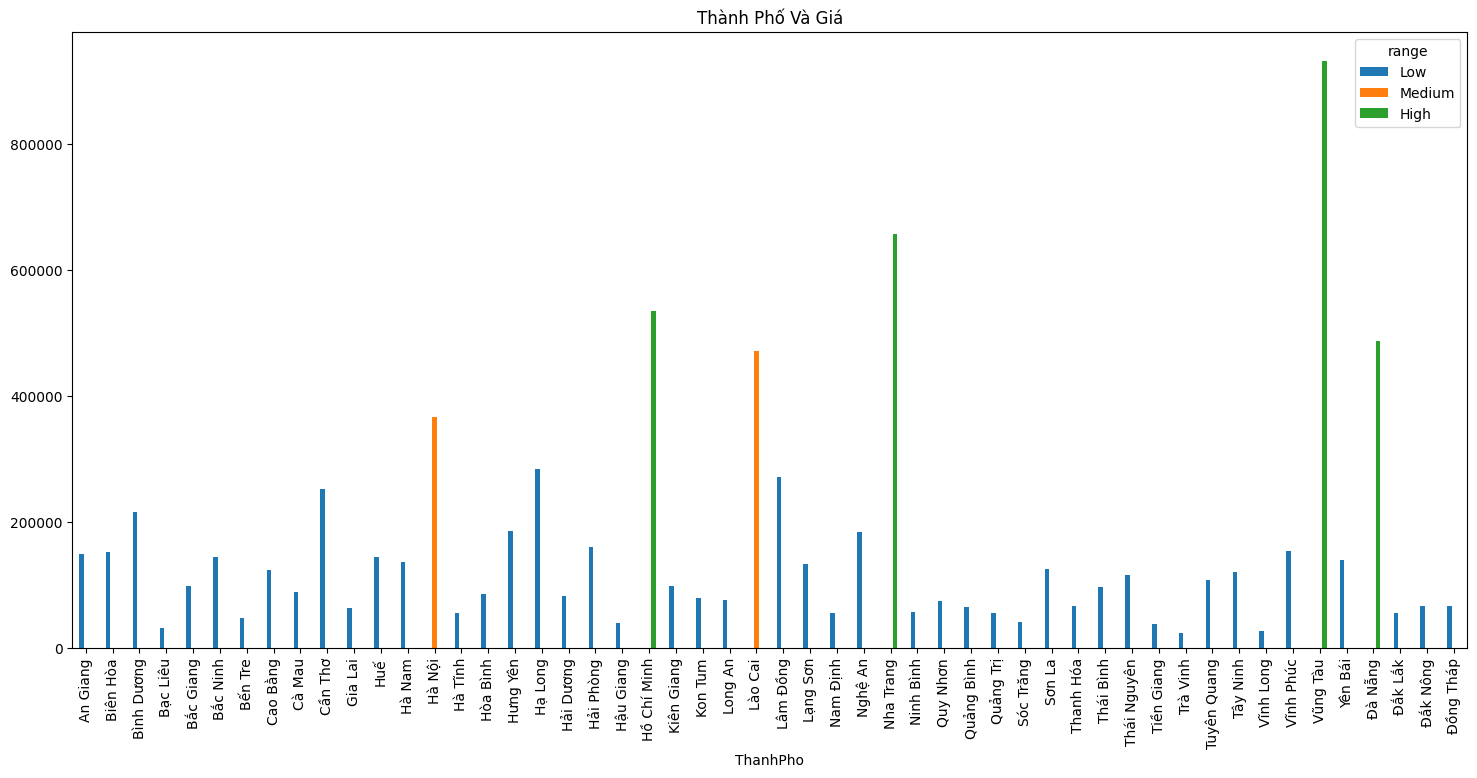

In [73]:
frame1 = df

table = frame1.groupby(['ThanhPho'])['USD'].mean().reset_index()
# Gộp bảng tính giá trị trung bình vào 'frame1'
frame1 = frame1.merge(table, how='left', on='ThanhPho', suffixes=('', '_mean'))

# Chỉ định nhãn cho 3 nhóm 'Low', 'Medium', 'High'
labels = ['Low', 'Medium', 'High']

# Tạo các nhóm giá trị USD với qcut
num_bins = 3  # Số lượng nhóm bạn muốn chia
frame1['range'] = pd.qcut(frame1['USD_mean'], q=num_bins, labels=labels, duplicates='drop')

# Thiết lập kích thước hình vẽ
plt.rcParams['figure.figsize'] = (18, 8)

# Tạo DataFrame để vẽ biểu đồ
df_plot = frame1.groupby(['ThanhPho', 'range'], observed=False)['USD'].mean().unstack(fill_value=0)
df_plot.plot(kind='bar')

# Thiết lập tiêu đề cho biểu đồ
plt.title('Thành Phố Và Giá')
plt.show()

In [76]:
pl = df['PhapLy'].value_counts()
pl.head(50)
# Không sổ : 0
# - Đã có sổ: 1
# - Đang chờ sổ: 2
# - Sổ chung | công chứng vi bằng: 3
# - viết tay: 4

PhapLy
1.0    12494
2.0       76
4.0       57
0.0       18
3.0        5
Name: count, dtype: int64

In [78]:
legal = {0.0 :'không sổ', 1.0 : 'đã có sổ', 2.0 : 'đang chờ sổ', 3.0 : 'Sổ chung | công chứng vi bằng', 4.0 : 'viết tay' }

df['legal'] = df['PhapLy'].map(legal)


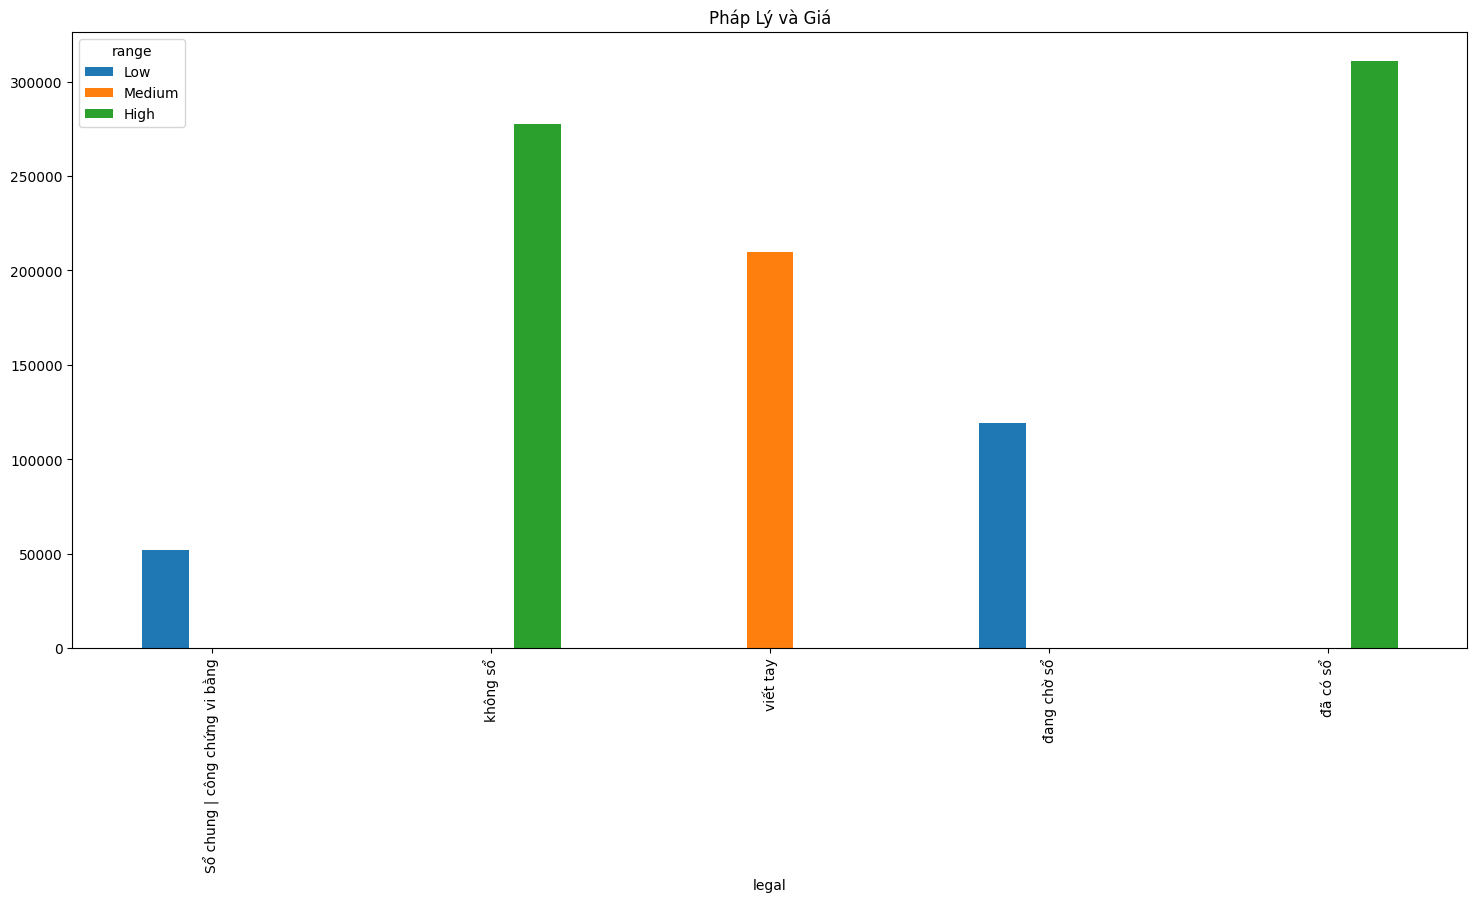

In [79]:


# Giả sử 'df' là DataFrame ban đầu của bạn
frame1 = df

# Tính giá trị trung bình của USD theo nhóm trong cột 'TinhTrangBDS'
col = 'legal'
table = frame1.groupby([col])['USD'].mean().reset_index()
# Gộp bảng tính giá trị trung bình vào 'frame1'
frame1 = frame1.merge(table, how='left', on=col, suffixes=('', '_mean'))

# Chỉ định nhãn cho 2 nhóm 'Low' và 'High'
labels = ['Low', 'Medium','High']

# Chuyển đổi Series thành mảng NumPy một chiều và áp dụng pd.cut
frame1['range'] = pd.cut(frame1['USD_mean'].to_numpy(), bins=3, labels=labels)

# Thiết lập kích thước hình vẽ
plt.rcParams['figure.figsize'] = (18, 8)

# Tạo DataFrame để vẽ biểu đồ
df_plot = frame1.groupby([col, 'range'], observed=False)['USD'].mean().unstack(fill_value=0)
df_plot.plot(kind='bar')

# Thiết lập tiêu đề cho biểu đồ
plt.title('Pháp Lý và Giá')
plt.show()


Như ta thấy thì nếu sổ chung hoặc đang chờ sổ giá sẽ kh cao bằng đã có sổ

In [84]:
# Kiểm tra giá trị NaN trong DataFrame
nan_values = df.isna()

# Xác định các cột có chứa giá trị NaN
nan_columns = nan_values.any()

# Lấy danh sách các cột có giá trị NaN
columns_with_nan = df.columns[nan_columns].tolist()

# Hiển thị danh sách các cột có giá trị NaN
print("Các cột có giá trị NaN:", columns_with_nan)


Các cột có giá trị NaN: ['District', 'MatTien', 'DuongVao', 'PhapLy', 'Lat', 'Long', 'Ward', 'ThanhPho', 'legal']


In [85]:
df.isna().sum()/df.shape[0]*100

Unnamed: 0     0.000000
DienTich       0.000000
DiaChi         0.000000
City           0.000000
District       0.019381
MucGia         0.000000
MatTien       29.194392
DuongVao      35.977776
PhapLy        18.276374
Lat            6.854448
Long           6.854448
Ward           0.859229
USD            0.000000
log_price      0.000000
ThanhPho      12.487887
legal         18.276374
dtype: float64

In [143]:
per =0.5
# Chọn xóa những cột dữ liệu có trên 50% data là NaN
df_dropped = df.dropna(axis=1, thresh=int(df.shape[0] * per))

# Xóa những hàng có bất kỳ giá trị NaN nào
df_dropped_2 = df_dropped.dropna(how='any')

# Hiển thị DataFrame sau khi xóa
df_dropped_2

,Unnamed: 0,DienTich,DiaChi,City,District,MucGia,MatTien,DuongVao,PhapLy,Lat,Long,Ward,USD,log_price,ThanhPho,legal
10,10,79.2,"Đường Cổ Nhuế, Thôn Nhuế, Xã Kim Chung, Đông A...",1.0,17.0,4.800000e+09,5.45,3.5,1.0,21.133051,105.779133,493.0,200000.0,12.206073,Hà Nội,đã có sổ
14,14,80.0,"Xã Bình Yên, Thạch Thất, Hà Nội",1.0,276.0,1.280000e+09,5.00,7.0,1.0,21.029954,105.538789,9982.0,53333.0,10.884311,Hà Nội,đã có sổ
17,17,129.5,"Hẻm 54, Phố Lý Thường Kiệt, Phường 1, Bảo Lộc,...",68.0,673.0,2.550000e+09,5.00,6.0,1.0,11.560026,107.810536,24823.0,106250.0,11.573550,Lâm Đồng,đã có sổ
45,45,51.0,"Phố An Trung, Phường An Hải Tây, Sơn Trà, Đà Nẵng",48.0,493.0,3.250000e+09,5.00,5.5,1.0,16.060609,108.232746,20278.0,135417.0,11.816114,Đà Nẵng,đã có sổ
49,49,60.0,"Đường 352, Xã Kỳ Sơn, Thủy Nguyên, Hải Phòng",31.0,311.0,2.950000e+08,4.50,5.0,1.0,20.995883,106.602085,11482.0,12292.0,9.416704,Hải Phòng,đã có sổ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23879,23879,144.0,"Phường Đề Thám, Cao Bằng, Cao Bằng",4.0,40.0,3.500000e+09,9.00,7.0,1.0,22.675031,106.225779,1282.0,145833.0,11.890217,Cao Bằng,đã có sổ
23880,23880,72.0,"Phường Duyệt Trung, Cao Bằng, Cao Bằng",4.0,40.0,5.900000e+08,4.50,7.0,1.0,22.633334,106.286879,1288.0,24583.0,10.109810,Cao Bằng,đã có sổ
23883,23883,177.0,"Phường Đề Thám, Cao Bằng, Cao Bằng",4.0,40.0,4.500000e+09,11.00,6.0,1.0,22.671997,106.218518,1282.0,187500.0,12.141534,Cao Bằng,đã có sổ
23887,23887,100.0,"Đường Quốc lộ 37, Phường Sông Hiến, Cao Bằng, ...",4.0,40.0,1.600000e+09,5.50,10.0,1.0,22.663841,106.234955,1267.0,66667.0,11.107465,Cao Bằng,đã có sổ


In [144]:
# Trích xuất các cột từ 1 đến 8
df_temp = df_dropped_2.iloc[:, 1:9]

# Loại bỏ cột "Giá" và "Địa chỉ" từ phần DataFrame đã trích xuất
df_x = df_temp.drop(columns=['MucGia', 'DiaChi'])

# Hiển thị DataFrame df_x
df_x

,DienTich,City,District,MatTien,DuongVao,PhapLy
10,79.2,1.0,17.0,5.45,3.5,1.0
14,80.0,1.0,276.0,5.00,7.0,1.0
17,129.5,68.0,673.0,5.00,6.0,1.0
45,51.0,48.0,493.0,5.00,5.5,1.0
49,60.0,31.0,311.0,4.50,5.0,1.0
...,...,...,...,...,...,...
23879,144.0,4.0,40.0,9.00,7.0,1.0
23880,72.0,4.0,40.0,4.50,7.0,1.0
23883,177.0,4.0,40.0,11.00,6.0,1.0
23887,100.0,4.0,40.0,5.50,10.0,1.0


tiền Việt quá lớn nên sẽ dùng tiền USD để tính

In [145]:
df_y = df_dropped_2.iloc[:, 12]
df_y

10       200000.0
14        53333.0
17       106250.0
45       135417.0
49        12292.0
           ...   
23879    145833.0
23880     24583.0
23883    187500.0
23887     66667.0
23889    241667.0
Name: USD, Length: 6438, dtype: float64

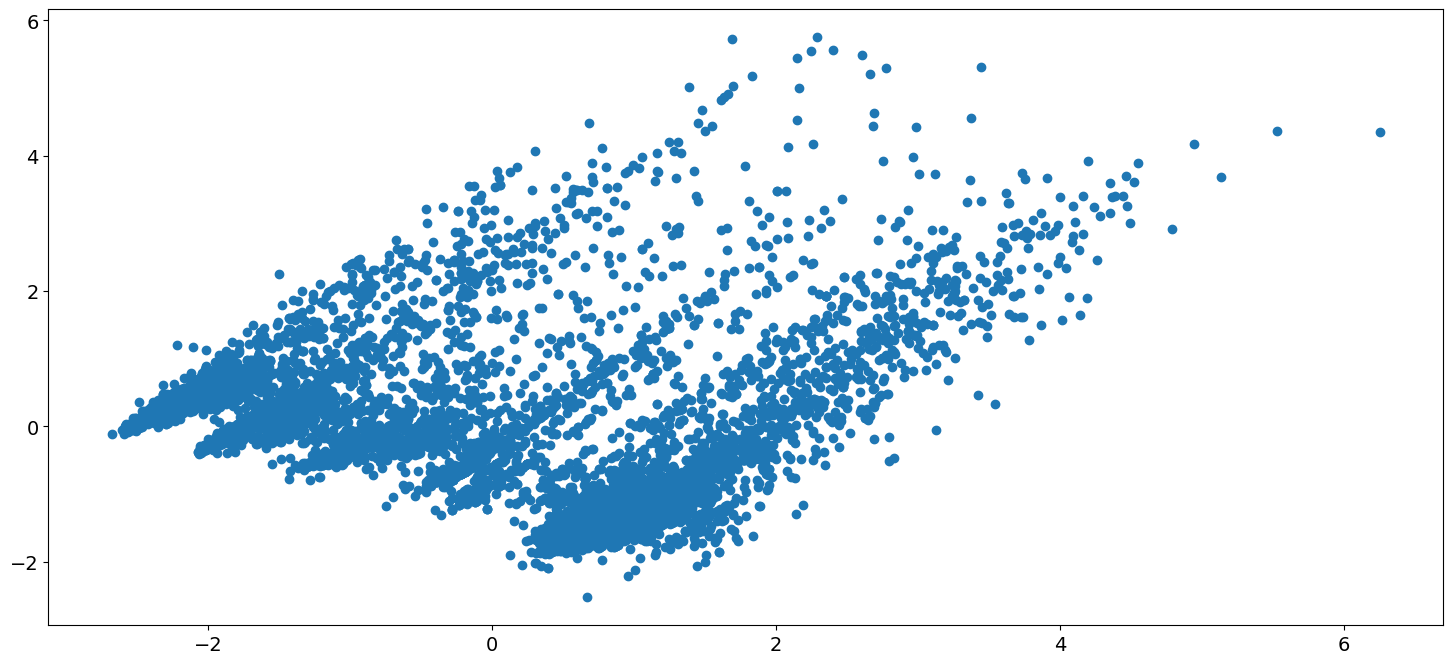

In [146]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df_x)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(scaled)
X_pca
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.show()

In [147]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


# Khởi tạo StandardScaler
scaler = StandardScaler()

# Tính toán các tham số chuẩn hóa từ dữ liệu
scaler.fit(df_x)

# Chuyển đổi dữ liệu theo tham số chuẩn hóa
data_preprocessed = scaler.transform(df_x)

# Chuyển đổi kết quả thành DataFrame để dễ đọc
data_preprocessed_df = pd.DataFrame(data_preprocessed, columns=df_x.columns)

# Hiển thị DataFrame đã được chuẩn hóa
print(data_preprocessed_df)


      DienTich      City  District   MatTien  DuongVao    PhapLy
0    -0.522895 -1.227640 -1.477696 -0.376666 -1.031160 -0.095546
1    -0.516751 -1.227640 -0.592611 -0.514349 -0.249339 -0.095546
2    -0.136565  0.789469  0.764063 -0.514349 -0.472716 -0.095546
3    -0.739486  0.187347  0.148946 -0.514349 -0.584405 -0.095546
4    -0.670361 -0.324457 -0.473005 -0.667332 -0.696094 -0.095546
...        ...       ...       ...       ...       ...       ...
6433 -0.025197 -1.137322 -1.399098  0.709508 -0.249339 -0.095546
6434 -0.578195 -1.137322 -1.399098 -0.667332 -0.249339 -0.095546
6435  0.228260 -1.137322 -1.399098  1.321437 -0.472716 -0.095546
6436 -0.363140 -1.137322 -1.399098 -0.361367  0.420793 -0.095546
6437  1.172964 -1.137322 -1.399098  2.545294 -0.249339 -0.095546

[6438 rows x 6 columns]


## Áp Mô Hình

<li>Data lưu trong 'df'</li>
<li>Tập x lưu trong 'data_preprocessed'</li>
<li>Tập y lưu trong 'df_y'</li>

<h1>1. Train test split</h1>

In [156]:
from sklearn.model_selection import train_test_split

# 80% train , 20% test
X,X_test,Y,Y_test = train_test_split(data_preprocessed,df_y,test_size=0.2,random_state=365)
# X: Dữ liệu huấn luyện (features)
# X_test: Dữ liệu kiểm tra (features)
# Y: Nhãn huấn luyện (target)
# Y_test: Nhãn kiểm tra (target)
print(X.shape, X_test.shape) 

(5150, 6) (1288, 6)


<h1>2. Linear Regression</h1>

<h1>3. Decision Tree Regressor</h1>

<h1>4. Random Forest Regressor</h1>

<h1>5. Polynomial Features</h1>